# Importing libraries and setup

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
from matplotlib import gridspec
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sns.set()
random.seed(1234)
data = pd.read_csv("card.csv",skiprows=[1],index_col=[0])
header = pd.read_csv('card.csv', index_col=0, nrows=2).iloc[0,:].values.tolist()

# Introduction of dataset

Peek at dataset (first 5 rows)

In [14]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Number of rows & columns of dataset
Rows: 30,000
Columns: 24

In [15]:
data.shape

(30000, 24)

Summary statistics

In [16]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Exploratory data analysis

Check for missing values within dataset

There are no missing values

In [18]:
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

Number of fradulent and valid transactions

In [20]:
print("Fraudulent Cases: " + str(len(data[data['Y']  == 1])))
print("Valid Transactions: " + str(len(data[data['Y']  == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data['Y']  == 1])/ data.shape[0]))

Fraudulent Cases: 6636
Valid Transactions: 23364
Proportion of Fraudulent Cases: 0.2212


Barchart of number of fradulent and valid cases

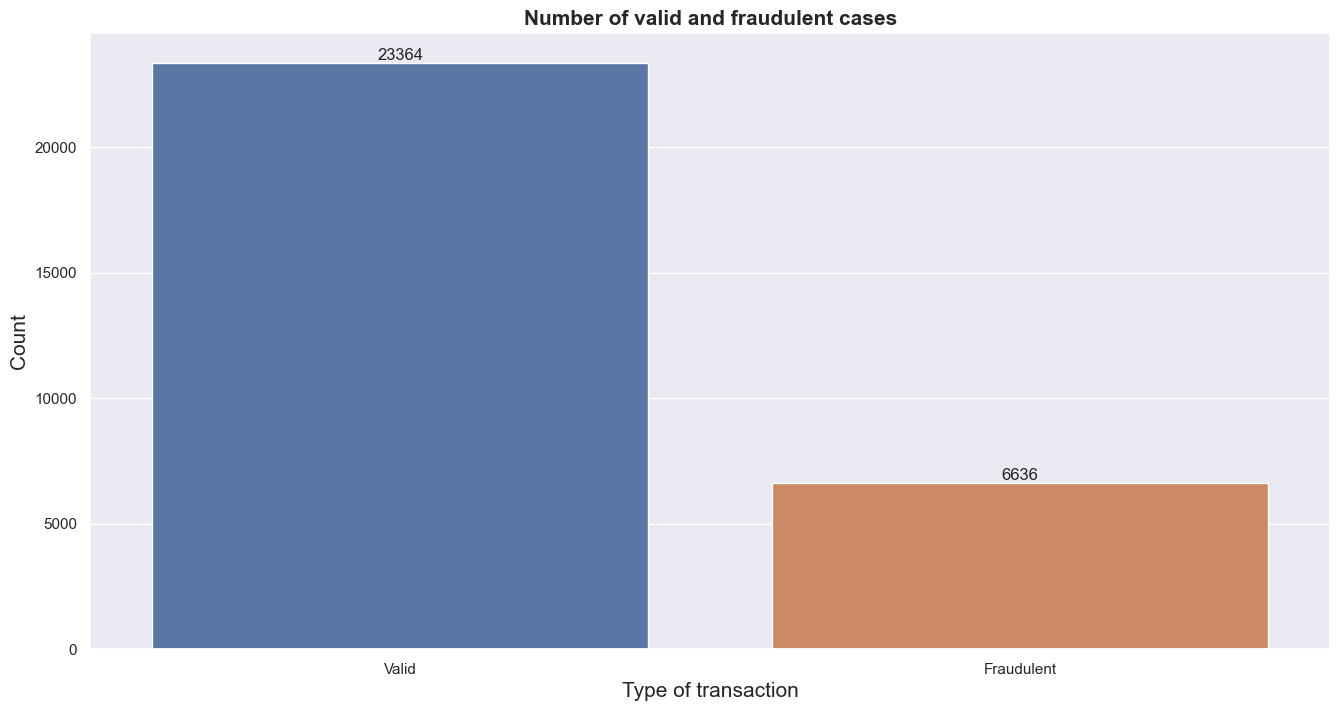

In [36]:
plt.figure(figsize = (16,8))
ax = sns.countplot(data = data, x = 'Y')
plt.title('Number of valid and fraudulent cases', fontsize=15, weight = 'bold')
plt.xlabel('Type of transaction', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ticks = [0,1], labels = ['Valid', 'Fraudulent'])
abs_values = data['Y'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels=abs_values)
plt.show()

Barchart of defaults by gender

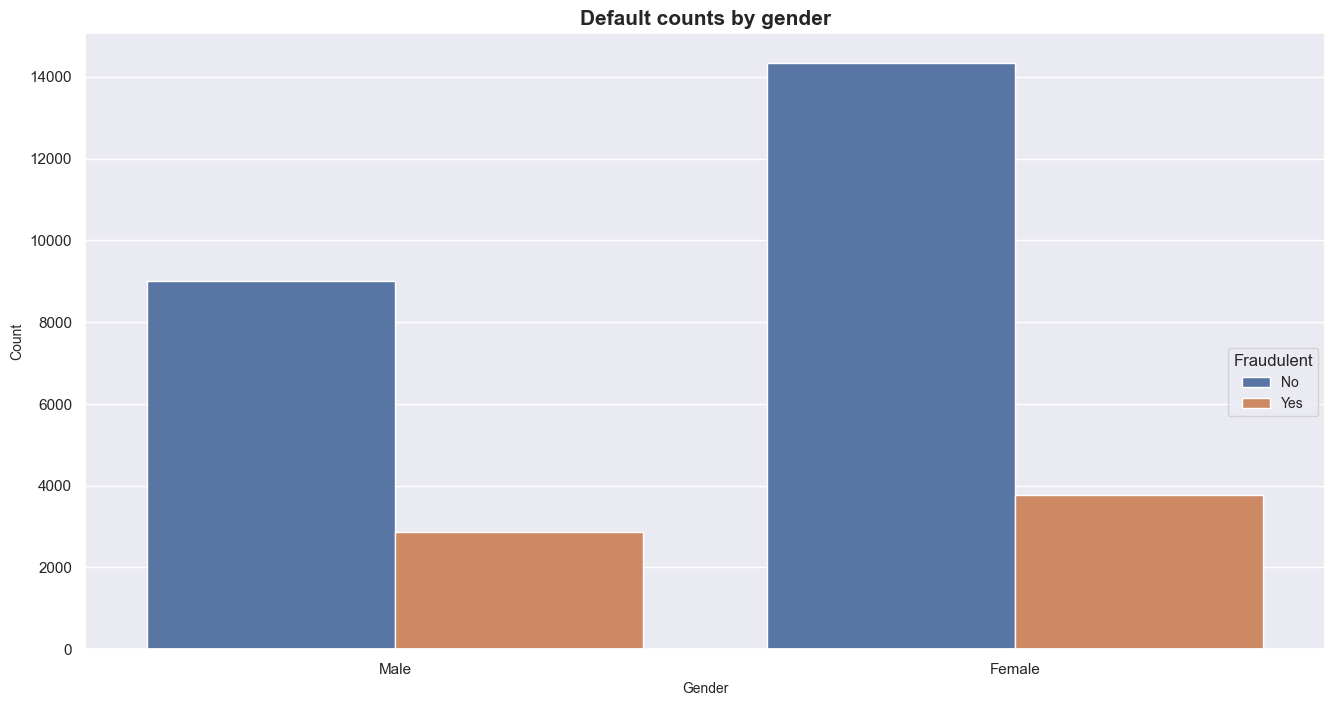

In [76]:
plt.figure(figsize = (16,8))
ax_gender = sns.countplot(data = data, hue = 'Y', x = 'X2')
plt.title('Default counts by gender', fontsize=15, weight = 'bold')
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks = [0,1], labels = ['Male', 'Female'])
plt.legend(bbox_to_anchor=(1,0.5), title='Fraudulent', fontsize=10, labels=['No','Yes'])
plt.show()

Plot distribution of attributes in dataset

In [ ]:
# Plot the distributions of the features
columns = data.iloc[:,0:23].columns
headerdict = {}
for i in range(len(columns.tolist())):
    headerdict[columns.tolist()[i]] = header[i]
plt.figure(figsize=(12,24*4))
grids = gridspec.GridSpec(23, 1)
for grid, index in enumerate(data[columns]):
 ax = plt.subplot(grids[grid])
 sns.kdeplot(x = data[index][data['Y'] == 1], fill = True, color = "pink", warn_singular=False)
 sns.kdeplot(x = data[index][data['Y'] == 0], fill = True, warn_singular=False)
 plt.legend(bbox_to_anchor=(1,0.5), title='Fraudulent', fontsize=10, labels=['Yes','No'])
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + headerdict[index])
plt.show()

Boxplot of attributes to remove outliers

In [ ]:
#Boxplots to observe outliers
columns = data.iloc[:,0:23].columns
plt.figure(figsize=(24,36*4))
grids = gridspec.GridSpec(23, 1)
for grid, index in enumerate(data[columns]):
 ax = plt.subplot(grids[grid])
 sns.boxplot(x = "Y", y = index, data = data) 
 ax.set_xlabel("")
 ax.set_xticks(ticks = [0,1], labels = ["Valid", "Fraudulent"])
 ax.set_title("Distribution of Column: "  + headerdict[index], weight = "bold", fontsize = 15)
 sns.despine(offset=10, trim=True) 
plt.show()

Correlation matrix of attributes within the dataset

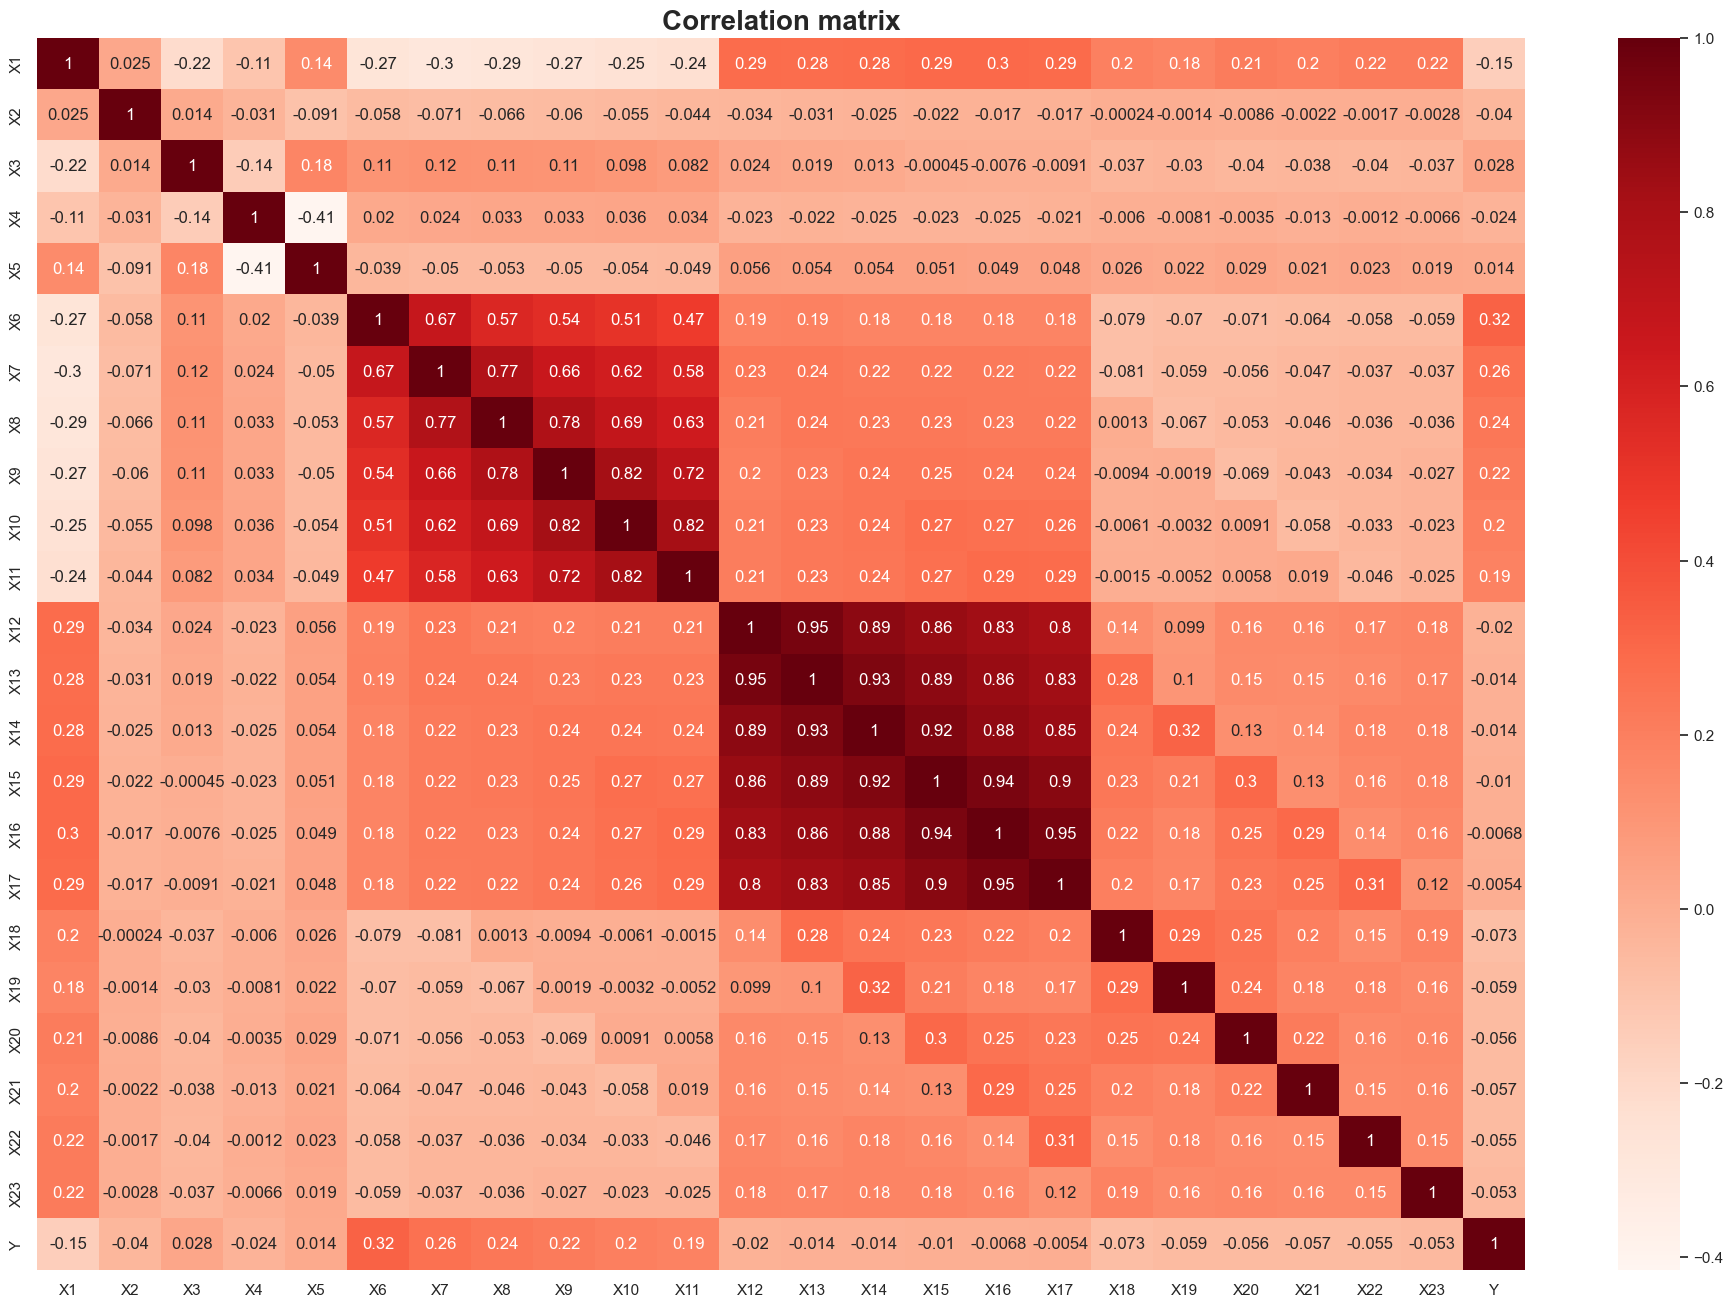

In [104]:
plt.figure(figsize=(24,16))
cor = data.corr()
ax_corr = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax_corr.set_title("Correlation matrix", weight = "bold", fontsize = 20)
plt.show()